In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import meteostat
import datetime as dt

In [2]:
transcriptome = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/plate1_4_tpm_normalized.csv",
    index_col=0,
)
rows_to_drop_expression_data = [
    "A2450525897_n01_undetermined",
    "A2449446903_n01_undetermined",
    "B250508004_n01_undetermined",
    "B2449500127_n01_undetermined",
]
transcriptome = transcriptome.drop(index=rows_to_drop_expression_data)
transcriptome = transcriptome.sort_index()

metadata = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/Plates_1_to_4_metadata_merged_luke.csv",
    index_col=0,
)
metadata = metadata.drop(
    columns=[
        "arb.sort",
        "sample-id",
        "Ambiguous Unstranded",
        "Ambiguous Forward",
        "Multimapping",
        "Unmapped Over Mapped",
    ]
)
metadata["Date and Time"] = metadata["date"] + " " + metadata["time"]
luke_time_data_format = "%-m/%-d/%y %-H:%-M"
metadata["Date and Time"] = pd.to_datetime(
    metadata["Date and Time"], format=luke_time_data_format
)

unusable_samples = [
    "A2450525897_n01_LICRNA01_A06",
    "A2450525897_n01_LICRNA01_A08",
    "A2450525897_n01_LICRNA01_C11",
    "A2450525897_n01_LICRNA01_D11",
    "A2450525897_n01_LICRNA01_D12",
    "A2449446903_n01_LICRNA02_F01",
    "B250508004_n01_LICRNA03_A08",
    "B2449500127_n01_LICRNA04_A04",
    "B2449500127_n01_LICRNA04_A06",
    "B2449500127_n01_LICRNA04_A07",
]
borderline_unusable = [
    "A2450525897_n01_LICRNA01_F03",
    "A2450525897_n01_LICRNA01_G07",
    "A2449446903_n01_LICRNA02_A04",
    "A2449446903_n01_LICRNA02_H10",
    "B250508004_n01_LICRNA03_H02",
    "B250508004_n01_LICRNA03_H10",
    "B2449500127_n01_LICRNA04_H02",
    "B2449500127_n01_LICRNA04_H11",
]

all_unsable = borderline_unusable + unusable_samples

trimmed_transcriptome = transcriptome.drop(index=all_unsable)
trimmed_metadata = metadata.drop(index=all_unsable)
trimmed_metadata = trimmed_metadata.sort_index()
trimmed_transcriptome = trimmed_transcriptome.dropna(how="all", axis=0)
trimmed_transcriptome = trimmed_transcriptome.dropna(how="all", axis=1)

In [5]:
long_term_transcriptome = trimmed_transcriptome.loc[
    trimmed_metadata["Experiment Type"] == "Long Term"
]
long_term_metadata = trimmed_metadata.loc[
    trimmed_metadata["Experiment Type"] == "Long Term"
]

In [13]:
## Check what a reasonable number of PCA components to keep is.
pca_model_10k_components = sklearn.decomposition.PCA(n_components=213)

tenk_components_results = pca_model_10k_components.fit_transform(
    long_term_transcriptome
)
missing_one_component = tenk_components_results.copy()
missing_one_component[:, 0] = 0

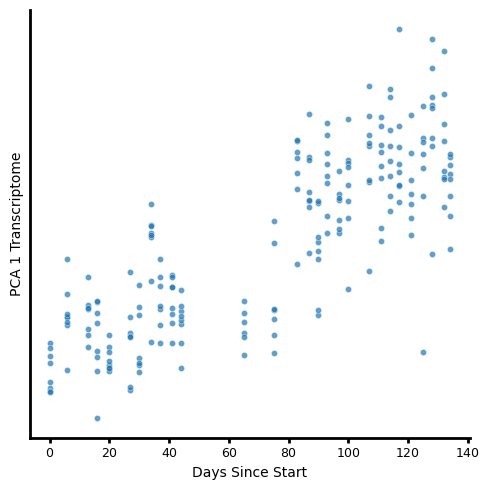

In [22]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
fig.patch.set_facecolor("white")
ax = sns.scatterplot(
    y=tenk_components_results[:, 0],
    x=long_term_metadata["daysincestart"],
    # hue=long_term_metadata["daysincestart"],
    s=20,
    alpha=0.7,
)
# ax2 = plt.twinx()
# sns.lineplot(
#     x=long_term_metadata_w_load_info['Sample Number'],
#     y=long_term_metadata_w_load_info['Scaled HAM16S'],
#     color = 'k'
# )
# plt.xticks([])
plt.yticks([])
plt.ylabel("PCA 1 Transcriptome", fontsize=10)
plt.xlabel("Days Since Start", fontsize=10)
sns.despine()
# ax.set_ylabel(ylabel = 'Normalized Gene Expression', fontsize = 14, color = 'k')
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)

ax.spines["top"].set_color("black")
ax.spines["top"].set_linewidth(0)

# ax2.spines["right"].set_color("black")
# ax2.spines["right"].set_linewidth(2)
# ax2.spines["top"].set_color("black")
# ax2.spines["top"].set_linewidth(0)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=9,
)  # rotation=90
# plt.yticks(fontsize=8)
# plt.ylim(-.02,1)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')
# plt.savefig('/Users/michael/Data/Luke_terrace_experiment/Output_for_Luke/Figs/6_interesting_genes_proteasome.pdf')

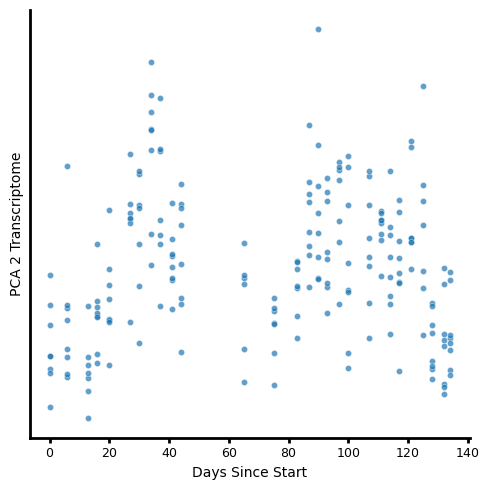

In [45]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
fig.patch.set_facecolor("white")
ax = sns.scatterplot(
    y=tenk_components_results[:, 1],
    x=long_term_metadata["daysincestart"],
    # hue=long_term_metadata["daysincestart"],
    s=20,
    alpha=0.7,
)
# ax2 = plt.twinx()
# sns.lineplot(
#     x=long_term_metadata_w_load_info['Sample Number'],
#     y=long_term_metadata_w_load_info['Scaled HAM16S'],
#     color = 'k'
# )
# plt.xticks([])
plt.yticks([])
plt.ylabel("PCA 2 Transcriptome", fontsize=10)
plt.xlabel("Days Since Start", fontsize=10)
sns.despine()
# ax.set_ylabel(ylabel = 'Normalized Gene Expression', fontsize = 14, color = 'k')
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)

ax.spines["top"].set_color("black")
ax.spines["top"].set_linewidth(0)

# ax2.spines["right"].set_color("black")
# ax2.spines["right"].set_linewidth(2)
# ax2.spines["top"].set_color("black")
# ax2.spines["top"].set_linewidth(0)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=9,
)  # rotation=90
# plt.yticks(fontsize=8)
# plt.ylim(-.02,1)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')
# plt.savefig('/Users/michael/Data/Luke_terrace_experiment/Output_for_Luke/Figs/6_interesting_genes_proteasome.pdf')

In [32]:
missing_one_component

array([[ 0.00000000e+00,  3.41248023e+03, -7.55837464e+03, ...,
        -6.46381309e+00, -6.93240416e+00, -3.83065697e-11],
       [ 0.00000000e+00,  6.91614434e+03,  1.01837917e+03, ...,
        -5.94086897e+01,  1.69905884e+01, -3.83065697e-11],
       [ 0.00000000e+00,  8.49830203e+03, -1.53442038e+03, ...,
        -2.87266395e+01, -1.26443342e+01, -3.83065697e-11],
       ...,
       [ 0.00000000e+00, -4.10496006e+04,  5.32738349e+02, ...,
        -1.16715538e+01, -9.75336320e+00, -3.83065697e-11],
       [ 0.00000000e+00,  6.61937224e+04, -9.96940275e+03, ...,
        -2.13532801e+01, -3.94322628e+01, -3.83065697e-11],
       [ 0.00000000e+00,  7.46793876e+04,  3.43896228e+03, ...,
        -1.86652273e+01, -8.80366878e+00, -3.83065697e-11]],
      shape=(213, 213))

In [33]:
inversed_on_max_components = pca_model_10k_components.inverse_transform(
    missing_one_component
)
inversed_on_max_components

array([[ 2.85836368e-01,  1.18091933e+01,  2.71892721e-04, ...,
         0.00000000e+00, -2.81460965e-03,  6.30077758e+00],
       [ 1.67678460e-01,  6.03409594e+00, -4.69991756e-04, ...,
         0.00000000e+00,  4.86531357e-03,  3.40806262e+00],
       [ 1.26374222e+00,  7.98308701e+00, -6.78807294e-04, ...,
         0.00000000e+00,  7.02695374e-03, -8.55814661e-02],
       ...,
       [ 1.55266033e+00,  7.40314844e+00, -5.25518786e-04, ...,
         0.00000000e+00,  5.44012455e-03,  4.38221199e+00],
       [ 3.83617704e-01,  4.93540524e+00, -4.98662429e-05, ...,
         0.00000000e+00,  5.16211009e-04,  4.85899013e+00],
       [ 2.77971929e-02,  4.02049942e+00, -7.79137098e-05, ...,
         0.00000000e+00,  8.06555954e-04,  7.84244875e+00]],
      shape=(213, 38287))

In [34]:
recompiled_df = pd.DataFrame(
    data=inversed_on_max_components,
    index=long_term_transcriptome.index,
    columns=long_term_transcriptome.columns,
)
recompiled_df

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,...,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp086,ArthCt118,ArthCp083,ArthCt111,ArthCp084,ArthCp085
A2449446903_n01_LICRNA02_A01,0.285836,11.809193,0.000272,3.589935,3.537374,-3.752717e-12,0.002636,30.093958,-5.734843e-13,3.730064,...,19.410587,44.468621,0.473259,0.112796,0.000344,0.0,0.053180,0.0,-0.002815,6.300778
A2449446903_n01_LICRNA02_A02,0.167678,6.034096,-0.000470,1.746349,3.551607,-3.198575e-12,-0.004557,24.388435,2.310088e-12,18.596148,...,-0.536708,9.239955,-0.818073,5.306054,-0.000595,0.0,0.427415,0.0,0.004865,3.408063
A2449446903_n01_LICRNA02_A03,1.263742,7.983087,-0.000679,0.655230,2.862343,-3.061971e-12,-0.006582,44.852291,3.124354e-12,13.529006,...,4.339103,15.736336,-1.181539,7.701733,-0.000860,0.0,0.034202,0.0,0.007027,-0.085581
A2449446903_n01_LICRNA02_A05,0.534987,2.904557,0.000554,1.659138,3.610469,-3.958067e-12,0.005374,24.564939,-1.671612e-12,23.378762,...,20.153548,17.534383,0.964690,0.229923,0.000702,0.0,0.737145,0.0,-0.005737,0.069875
A2449446903_n01_LICRNA02_A06,1.489755,1.084919,0.000349,5.948395,4.132425,-3.809084e-12,0.003383,18.135293,-8.729750e-13,4.702605,...,18.092329,43.932363,0.607308,0.144745,0.000442,0.0,1.142456,0.0,-0.003612,0.043989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_G03,1.039484,8.292329,0.000211,1.742236,4.670275,-4.459066e-12,0.002050,29.535352,2.112227e-12,11.230889,...,1.135059,14.559622,0.368010,2.601034,0.000268,0.0,1.032227,0.0,-0.002189,2.307839
B250508004_n01_LICRNA03_G04,0.512625,8.376277,-0.000045,3.395933,3.080188,-3.458962e-12,-0.000441,60.339832,3.253523e-12,23.798586,...,3.635250,10.072490,-0.079132,10.127048,-0.000058,0.0,0.356220,0.0,0.000471,4.395531
B250508004_n01_LICRNA03_H01,1.552660,7.403148,-0.000526,2.200172,3.700152,-6.809313e-12,-0.005096,54.987906,-4.970372e-12,40.749508,...,-1.635898,6.023984,15.680819,4.705938,-0.000665,0.0,0.281497,0.0,0.005440,4.382212
B250508004_n01_LICRNA03_H03,0.383618,4.935405,-0.000050,0.998435,3.773630,-1.131510e-11,-0.000484,14.489354,-1.834234e-12,10.377494,...,4.020594,7.510859,-0.086798,0.309182,-0.000063,0.0,0.012669,0.0,0.000516,4.858990


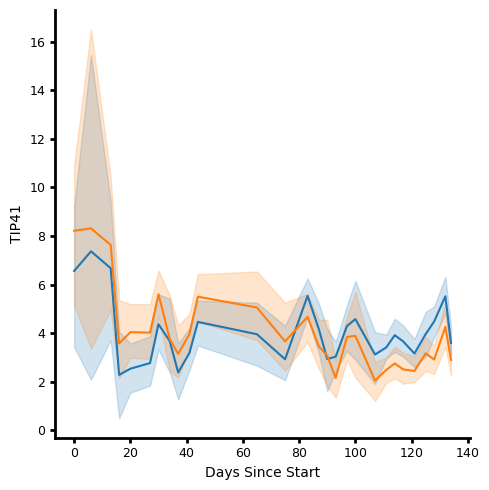

In [39]:
## Plot lineplot of AT4G34270 in the original data and the data with the first component removed.
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
fig.patch.set_facecolor("white")
ax = sns.lineplot(
    y=recompiled_df["AT4G34270"],
    x=long_term_metadata["daysincestart"],
    # hue=long_term_metadata["daysincestart"],
    # s=20,
    # alpha=0.7,
)
ax = sns.lineplot(
    y=long_term_transcriptome["AT4G34270"],
    x=long_term_metadata["daysincestart"],
    # hue=long_term_metadata["daysincestart"],
    # s=20,
    # alpha=0.7,
)
# ax2 = plt.twinx()
# sns.lineplot(
#     x=long_term_metadata_w_load_info['Sample Number'],
#     y=long_term_metadata_w_load_info['Scaled HAM16S'],
#     color = 'k'
# )
# plt.xticks([])
# plt.yticks([])
plt.ylabel("TIP41", fontsize=10)
plt.xlabel("Days Since Start", fontsize=10)
sns.despine()
# ax.set_ylabel(ylabel = 'Normalized Gene Expression', fontsize = 14, color = 'k')
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)

ax.spines["top"].set_color("black")
ax.spines["top"].set_linewidth(0)

# ax2.spines["right"].set_color("black")
# ax2.spines["right"].set_linewidth(2)
# ax2.spines["top"].set_color("black")
# ax2.spines["top"].set_linewidth(0)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=9,
)  # rotation=90
plt.yticks(fontsize=9)
# plt.ylim(-.02,1)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')
# plt.savefig('/Users/michael/Data/Luke_terrace_experiment/Output_for_Luke/Figs/6_interesting_genes_proteasome.pdf')

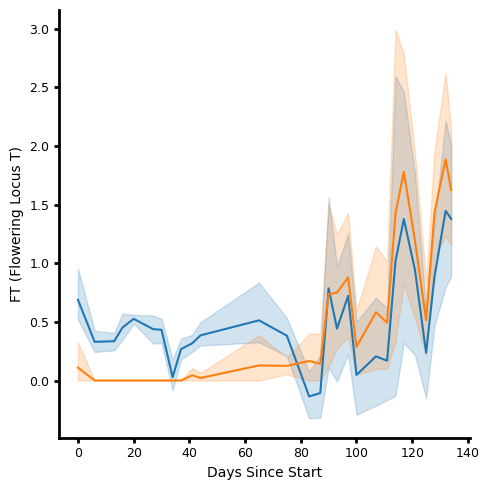

In [44]:
## Plot lineplot of AT4G34270 in the original data and the data with the first component removed.
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
fig.patch.set_facecolor("white")
ax = sns.lineplot(
    y=recompiled_df["AT1G65480"],
    x=long_term_metadata["daysincestart"],
    # hue=long_term_metadata["daysincestart"],
    # s=20,
    # alpha=0.7,
)
ax = sns.lineplot(
    y=long_term_transcriptome["AT1G65480"],
    x=long_term_metadata["daysincestart"],
    # hue=long_term_metadata["daysincestart"],
    # s=20,
    # alpha=0.7,
)
# ax2 = plt.twinx()
# sns.lineplot(
#     x=long_term_metadata_w_load_info['Sample Number'],
#     y=long_term_metadata_w_load_info['Scaled HAM16S'],
#     color = 'k'
# )
# plt.xticks([])
# plt.yticks([])
plt.ylabel("FT (Flowering Locus T)", fontsize=10)
plt.xlabel("Days Since Start", fontsize=10)
sns.despine()
# ax.set_ylabel(ylabel = 'Normalized Gene Expression', fontsize = 14, color = 'k')
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)

ax.spines["top"].set_color("black")
ax.spines["top"].set_linewidth(0)

# ax2.spines["right"].set_color("black")
# ax2.spines["right"].set_linewidth(2)
# ax2.spines["top"].set_color("black")
# ax2.spines["top"].set_linewidth(0)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=9,
)  # rotation=90
plt.yticks(fontsize=9)
# plt.ylim(-.02,1)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')
# plt.savefig('/Users/michael/Data/Luke_terrace_experiment/Output_for_Luke/Figs/6_interesting_genes_proteasome.pdf')

In [37]:
delta_for_every_gene = recompiled_df - long_term_transcriptome
delta_for_every_gene

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,...,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp086,ArthCt118,ArthCp083,ArthCt111,ArthCp084,ArthCp085
A2449446903_n01_LICRNA02_A01,-0.097003,-0.119990,0.000272,-0.141592,-0.064814,-3.752717e-12,0.002636,-0.969585,-5.734843e-13,-0.236872,...,1.459680,0.259547,0.473259,0.112796,0.000344,0.0,0.053180,0.0,-0.002815,0.034279
A2449446903_n01_LICRNA02_A02,0.167678,0.207414,-0.000470,0.244754,0.112038,-3.198575e-12,-0.004557,1.676018,2.310088e-12,0.409455,...,-2.523192,-0.448650,-0.818073,-0.194979,-0.000595,0.0,-0.091927,0.0,0.004865,-0.059255
A2449446903_n01_LICRNA02_A03,0.242177,0.299567,-0.000679,0.353498,0.161816,-3.061971e-12,-0.006582,2.420666,3.124354e-12,0.591374,...,-3.644237,-0.647984,-1.181539,-0.281607,-0.000860,0.0,-0.132770,0.0,0.007027,-0.085581
A2449446903_n01_LICRNA02_A05,-0.197730,-0.244587,0.000554,-0.288620,-0.132117,-3.958067e-12,0.005374,-1.976398,-1.671612e-12,-0.482838,...,2.975405,0.529058,0.964690,0.229923,0.000702,0.0,0.108403,0.0,-0.005737,0.069875
A2449446903_n01_LICRNA02_A06,-0.124479,-0.153976,0.000349,-0.181697,-0.083173,-3.809084e-12,0.003383,-1.244216,-8.729750e-13,-0.303965,...,1.873128,0.333062,0.607308,0.144745,0.000442,0.0,0.068244,0.0,-0.003612,0.043989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_G03,-0.075430,-0.093305,0.000211,-0.110103,-0.050400,-4.459066e-12,0.002050,-0.753957,2.112227e-12,-0.184193,...,1.135059,0.201825,0.368010,0.087711,0.000268,0.0,0.041354,0.0,-0.002189,0.026656
B250508004_n01_LICRNA03_G04,0.016219,0.020063,-0.000045,0.023675,0.010837,-3.458962e-12,-0.000441,0.162121,3.253523e-12,0.039606,...,-0.244068,-0.043398,-0.079132,-0.018860,-0.000058,0.0,-0.008892,0.0,0.000471,-0.005732
B250508004_n01_LICRNA03_H01,0.187489,0.231918,-0.000526,0.273671,0.125274,-6.809313e-12,-0.005096,1.874031,-4.970372e-12,0.457830,...,-2.821294,-0.501656,-0.914724,-0.218014,-0.000665,0.0,-0.102788,0.0,0.005440,-0.066255
B250508004_n01_LICRNA03_H03,0.017791,0.022007,-0.000050,0.025969,0.011887,-1.131510e-11,-0.000484,0.177826,-1.834234e-12,0.043443,...,-0.267711,-0.047602,-0.086798,-0.020687,-0.000063,0.0,-0.009754,0.0,0.000516,-0.006287


In [41]:
delta_for_every_gene.sum().max()

np.float64(1.862645149230957e-09)

In [ ]:
corr_results = trimmed_transcriptome.corrwith(recompiled_df, method="pearson")
print(f"Min equals {corr_results.min()}")
print(f"Max equals {corr_results.max()}")
print(f"Median equals {corr_results.median()}")

In [46]:
start_time = dt.datetime(2023, 10, 1)
end_time = dt.datetime(2024, 4, 30)
luke_apt_point = meteostat.Point(40.73005, -73.99450)
luke_hourly_data = meteostat.Daily(luke_apt_point, start_time, end_time).fetch()

In [47]:
luke_hourly_data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2023-10-01,20.8,16.1,27.2,0.0,0.0,<NA>,6.3,<NA>,1021.7,<NA>
2023-10-02,21.6,18.9,26.7,0.0,0.0,<NA>,7.7,<NA>,1022.1,<NA>
2023-10-03,21.6,17.2,27.8,0.0,0.0,<NA>,5.7,<NA>,1021.7,<NA>
2023-10-04,22.3,18.9,28.3,0.0,0.0,<NA>,7.3,<NA>,1022.3,<NA>
2023-10-05,20.6,17.2,24.4,0.0,0.0,<NA>,6.9,<NA>,1023.3,<NA>
...,...,...,...,...,...,...,...,...,...,...
2024-04-26,10.2,6.7,14.4,0.0,0.0,<NA>,10.8,<NA>,1031.6,<NA>
2024-04-27,10.8,7.8,15.0,0.0,0.0,<NA>,11.7,<NA>,1032.4,<NA>
2024-04-28,15.5,10.0,23.9,0.9,0.0,<NA>,4.8,<NA>,1021.6,<NA>


In [48]:
series_of_metadata_dates = pd.to_datetime(long_term_metadata["Date and Time"]).dt.date
meta_data_matched_hourly_data = luke_hourly_data.loc[series_of_metadata_dates]
tidy_meta_data_matched_hourly_data = meta_data_matched_hourly_data[
    ["tavg", "tmin", "tmax"]
].melt(ignore_index=False)
tidy_meta_data_matched_hourly_data

,variable,value
time,,
2024-01-23,tavg,2.7
2024-01-27,tavg,6.7
2024-02-02,tavg,5.0
2024-02-09,tavg,7.5
2024-02-16,tavg,4.5
...,...,...
2024-01-30,tmax,3.3
2023-12-05,tmax,6.7
2024-03-14,tmax,22.2


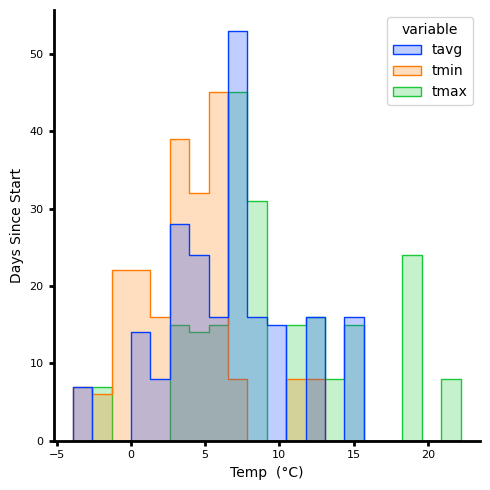

In [49]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
fig.patch.set_facecolor("white")
ax = sns.histplot(
    data=tidy_meta_data_matched_hourly_data,
    x="value",
    hue="variable",
    element="step",
    palette="bright",
    bins=20,
)
# ax2 = plt.twinx()
# sns.lineplot(
#     x=long_term_metadata_w_load_info['Sample Number'],
#     y=long_term_metadata_w_load_info['Scaled HAM16S'],
#     color = 'k'
# )
# plt.xticks([]). ## Removes X Ticks
# plt.yticks([]).  ## Removes Y Ticks
plt.xlabel("Temp  (°C)", fontsize=10)
plt.ylabel("Days Since Start", fontsize=10)
sns.despine()
# ax.set_ylabel(ylabel = 'Normalized Gene Expression', fontsize = 14, color = 'k')
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)

ax.spines["top"].set_color("black")
ax.spines["top"].set_linewidth(0)

# ax2.spines["right"].set_color("black")
# ax2.spines["right"].set_linewidth(2)
# ax2.spines["top"].set_color("black")
# ax2.spines["top"].set_linewidth(0)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=8,
)  # rotation=90
plt.yticks(fontsize=8)
# plt.ylim(-.02,1)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')
# plt.savefig('/Users/michael/Data/Luke_terrace_experiment/Output_for_Luke/Figs/6_interesting_genes_proteasome.pdf')

In [50]:
long_term_metadata

,plate.pos,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,No Feature,plate_row,plate_col,Total Reads,Experiment Type,Sample Month,daysincestart,Date and Time
filename,,,,,,,,,,,,,,,,,
A2449446903_n01_LICRNA02_A01,A01,LIC157,plant,t14,1/23/24,8:00,LIC_02,LICRNA_02,758284.0,82176.0,A,1,1246970.0,Long Term,January,83,2024-01-23 08:00:00
A2449446903_n01_LICRNA02_A02,A02,LIC169,plant,t15,1/27/24,8:00,LIC_02,LICRNA_02,3071877.0,353549.0,A,2,4985602.0,Long Term,January,87,2024-01-27 08:00:00
A2449446903_n01_LICRNA02_A03,A03,LIC193,plant,t17,2/2/24,8:00,LIC_03,LICRNA_02,1213638.0,158864.0,A,3,2465662.0,Long Term,February,93,2024-02-02 08:00:00
A2449446903_n01_LICRNA02_A05,A05,LIC217,plant,t19,2/9/24,8:00,LIC_03,LICRNA_02,1303436.0,90929.0,A,5,1515395.0,Long Term,February,100,2024-02-09 08:00:00
A2449446903_n01_LICRNA02_A06,A06,LIC229,plant,t20,2/16/24,8:00,LIC_03,LICRNA_02,1591231.0,141665.0,A,6,1924391.0,Long Term,February,107,2024-02-16 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_G03,G03,LIC355,plant,t16,1/30/24,8:00,LIC_04,LICRNA_03,1609116.0,165214.0,G,3,3627980.0,Long Term,January,90,2024-01-30 08:00:00
B250508004_n01_LICRNA03_G04,G04,LIC367,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,1477644.0,189073.0,G,4,2732871.0,Long Term,December,34,2023-12-05 08:00:00
B250508004_n01_LICRNA03_H01,H01,LIC332,plant,t28,3/14/24,8:00,LIC_04,LICRNA_03,5963067.0,589822.0,H,1,9338754.0,Long Term,March,134,2024-03-14 08:00:00


In [51]:
meta_data_matched_hourly_data = meta_data_matched_hourly_data.reset_index(
    names="date_weather_data"
)
meta_data_matched_hourly_data.index = long_term_metadata.index
meta_data_matched_hourly_data

,date_weather_data,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
filename,,,,,,,,,,,
A2449446903_n01_LICRNA02_A01,2024-01-23,2.7,1.1,3.9,0.0,0.0,<NA>,10.4,<NA>,1032.9,<NA>
A2449446903_n01_LICRNA02_A02,2024-01-27,6.7,5.6,8.3,0.0,0.0,<NA>,6.0,<NA>,1022.4,<NA>
A2449446903_n01_LICRNA02_A03,2024-02-02,5.0,3.9,6.1,4.1,0.0,<NA>,7.3,<NA>,1012.5,<NA>
A2449446903_n01_LICRNA02_A05,2024-02-09,7.5,5.0,11.1,0.2,0.0,<NA>,7.9,<NA>,1019.6,<NA>
A2449446903_n01_LICRNA02_A06,2024-02-16,4.5,2.2,8.3,0.0,0.0,<NA>,9.6,<NA>,1011.7,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_G03,2024-01-30,2.5,2.2,3.3,0.0,0.0,<NA>,8.8,<NA>,1022.6,<NA>
B250508004_n01_LICRNA03_G04,2023-12-05,5.7,4.4,6.7,0.0,0.0,<NA>,8.8,<NA>,1016.3,<NA>
B250508004_n01_LICRNA03_H01,2024-03-14,12.1,7.2,22.2,0.0,0.0,<NA>,6.9,<NA>,1016.0,<NA>


In [52]:
long_term_metadata = pd.concat(
    [long_term_metadata, meta_data_matched_hourly_data[["tavg", "tmax", "tmin"]]],
    ignore_index=False,
    axis=1,
)

In [53]:
long_term_metadata

,plate.pos,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,No Feature,plate_row,plate_col,Total Reads,Experiment Type,Sample Month,daysincestart,Date and Time,tavg,tmax,tmin
filename,,,,,,,,,,,,,,,,,,,,
A2449446903_n01_LICRNA02_A01,A01,LIC157,plant,t14,1/23/24,8:00,LIC_02,LICRNA_02,758284.0,82176.0,A,1,1246970.0,Long Term,January,83,2024-01-23 08:00:00,2.7,3.9,1.1
A2449446903_n01_LICRNA02_A02,A02,LIC169,plant,t15,1/27/24,8:00,LIC_02,LICRNA_02,3071877.0,353549.0,A,2,4985602.0,Long Term,January,87,2024-01-27 08:00:00,6.7,8.3,5.6
A2449446903_n01_LICRNA02_A03,A03,LIC193,plant,t17,2/2/24,8:00,LIC_03,LICRNA_02,1213638.0,158864.0,A,3,2465662.0,Long Term,February,93,2024-02-02 08:00:00,5.0,6.1,3.9
A2449446903_n01_LICRNA02_A05,A05,LIC217,plant,t19,2/9/24,8:00,LIC_03,LICRNA_02,1303436.0,90929.0,A,5,1515395.0,Long Term,February,100,2024-02-09 08:00:00,7.5,11.1,5.0
A2449446903_n01_LICRNA02_A06,A06,LIC229,plant,t20,2/16/24,8:00,LIC_03,LICRNA_02,1591231.0,141665.0,A,6,1924391.0,Long Term,February,107,2024-02-16 08:00:00,4.5,8.3,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_G03,G03,LIC355,plant,t16,1/30/24,8:00,LIC_04,LICRNA_03,1609116.0,165214.0,G,3,3627980.0,Long Term,January,90,2024-01-30 08:00:00,2.5,3.3,2.2
B250508004_n01_LICRNA03_G04,G04,LIC367,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,1477644.0,189073.0,G,4,2732871.0,Long Term,December,34,2023-12-05 08:00:00,5.7,6.7,4.4
B250508004_n01_LICRNA03_H01,H01,LIC332,plant,t28,3/14/24,8:00,LIC_04,LICRNA_03,5963067.0,589822.0,H,1,9338754.0,Long Term,March,134,2024-03-14 08:00:00,12.1,22.2,7.2


In [54]:
metadata["Date and Time"].iloc[0].date()

datetime.date(2023, 11, 1)

In [55]:
### I suspect PCA 2 is weather or cold or light or something cause it looks like it goes up and then down with time but doesn't look clean to any of those

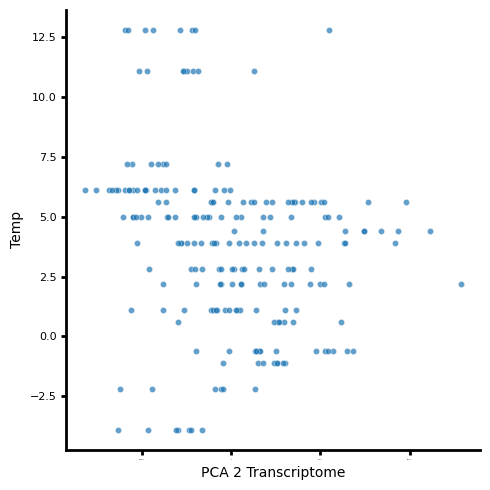

In [57]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
fig.patch.set_facecolor("white")
ax = sns.scatterplot(
    x=tenk_components_results[:, 1],
    y=long_term_metadata["tmin"],
    # hue=long_term_metadata["daysincestart"],
    s=20,
    alpha=0.7,
)
# ax2 = plt.twinx()
# sns.lineplot(
#     x=long_term_metadata_w_load_info['Sample Number'],
#     y=long_term_metadata_w_load_info['Scaled HAM16S'],
#     color = 'k'
# )
#
# plt.yticks([])
plt.xlabel("PCA 2 Transcriptome", fontsize=10)
plt.ylabel("Temp", fontsize=10)
sns.despine()
# ax.set_ylabel(ylabel = 'Normalized Gene Expression', fontsize = 14, color = 'k')
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)

ax.spines["top"].set_color("black")
ax.spines["top"].set_linewidth(0)

# ax2.spines["right"].set_color("black")
# ax2.spines["right"].set_linewidth(2)
# ax2.spines["top"].set_color("black")
# ax2.spines["top"].set_linewidth(0)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=0,
)  # rotation=90
plt.yticks(fontsize=8)
# plt.ylim(-.02,1)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')
# plt.savefig('/Users/michael/Data/Luke_terrace_experiment/Output_for_Luke/Figs/6_interesting_genes_proteasome.pdf')